In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath(r"C:\ET_study\Image Processing\module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
img_path_ad = glob.glob('../data/train/ad/*.*') + glob.glob('../data/test/ad/*.*')
img_path_normal = glob.glob('../data/train/normal/*.*') + glob.glob('../data/test/normal/*.*')

img_paths = img_path_ad + img_path_normal

In [3]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in img_paths:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32))/255.
    img = np.expand_dims(img, axis=0)
    imgs = np.append(imgs, img, axis=0)

imgs.shape

(280, 150, 150, 3)

In [4]:
target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

In [5]:
from sklearn.model_selection import train_test_split

x_train, X_val, y_train, y_val = train_test_split(imgs, target, test_size=0.2, shuffle=True)

In [6]:
inputs = Input(shape=(150, 150, 3))
Conv1 = Conv2D(64, kernel_size=3, activation='relu')(inputs)
Conv2 = Conv2D(32, kernel_size=3, activation='relu')(Conv1)
max_pool = MaxPooling2D(pool_size=2)(Conv2)
flatten_layer = Flatten()(max_pool)
dense1 = Dense(120, activation='relu')(flatten_layer)
drop_out = Dropout(0.2)(dense1)
dense2 = Dense(32, activation='relu')(drop_out)
output = Dense(1, activation='sigmoid')(dense2)

alz_model = Model(inputs = inputs, outputs=output)

alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 120)               20463480  
                                                             

In [9]:
alz_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
early_stop = EarlyStopping(patience=10)
check_model = ModelCheckpoint(filepath='./alz_model.hdf5',
                                                 save_best_only=True)

In [10]:
history = alz_model.fit(x_train, y_train, epochs=100,
                        batch_size=20,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 13s 915ms/step - loss: 0.9121 - acc: 0.5045 - val_loss: 0.6751 - val_acc: 0.5893
Epoch 2/100
12/12 [==============================] - 10s 844ms/step - loss: 0.6082 - acc: 0.7366 - val_loss: 0.5232 - val_acc: 0.6607
Epoch 3/100
12/12 [==============================] - 12s 1s/step - loss: 0.3901 - acc: 0.8571 - val_loss: 0.2334 - val_acc: 0.9464
Epoch 4/100
12/12 [==============================] - 12s 985ms/step - loss: 0.2426 - acc: 0.9062 - val_loss: 0.2141 - val_acc: 0.8929
Epoch 5/100
12/12 [==============================] - 12s 961ms/step - loss: 0.0961 - acc: 0.9688 - val_loss: 0.1066 - val_acc: 0.9821
Epoch 6/100
12/12 [==============================] - 12s 975ms/step - loss: 0.0544 - acc: 0.9821 - val_loss: 0.0776 - val_acc: 0.9821
Epoch 7/100
12/12 [==============================] - 12s 959ms/step - loss: 0.0300 - acc: 0.9911 - val_loss: 0.0555 - val_acc: 0.9821
Epoch 8/100
12/12 [==============================] - 12s 973ms/st

In [11]:
alz_model.evaluate(X_val, y_val)

2/2 [==============================] - 0s 169ms/step - loss: 0.0333 - acc: 0.9821


[0.033322982490062714, 0.9821428656578064]

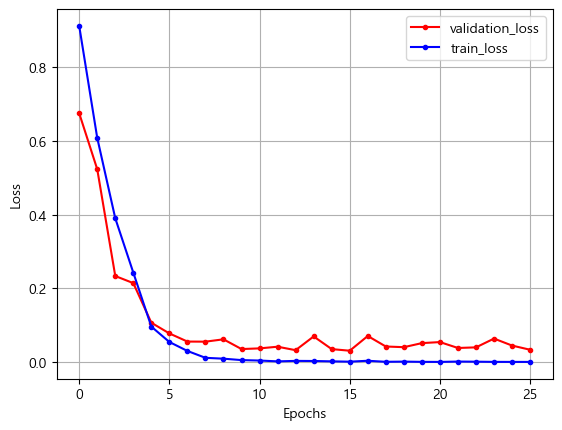

In [12]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']

plt.plot(val_loss, marker='.', c='r', label='validation_loss')
plt.plot(train_loss, marker='.', c='b', label='train_loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
target = np.array([1]*len(img_path_ad) + [0]*len(img_path_normal))

def img_prep(x):
    x = load_img(x)
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    return x

In [15]:
imgs = np.zeros((0, 150, 150, 3), np.float32)

for i in img_paths:
    x = img_prep(i)
    imgs = np.append(imgs, img, axis=0)

imgs.shape

(280, 150, 150, 3)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(imgs, target, test_size=0.2,
                                                  shuffle=True)

In [17]:
transfer_vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

transfer_vgg16.trainable = False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
finetun_vgg6 = Sequential()
finetun_vgg6.add(transfer_vgg16)
finetun_vgg6.add(Flatten())
finetun_vgg6.add(Dense(64, activation='relu'))
finetun_vgg6.add(Dropout(0.2))
finetun_vgg6.add(Dense(1, activation='sigmoid'))
finetun_vgg6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
alz_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
early_stop = EarlyStopping(patience=10)
check_model = ModelCheckpoint(filepath='./alz_model_another.hdf5',
                                                 save_best_only=True)

In [21]:
history_another = alz_model.fit(x_train, y_train, epochs=100,
                        batch_size=20,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stop, check_model])

Epoch 1/100
12/12 [==============================] - 14s 982ms/step - loss: 1.7283 - acc: 0.5357 - val_loss: 0.6913 - val_acc: 0.5357
Epoch 2/100
12/12 [==============================] - 12s 1s/step - loss: 0.6932 - acc: 0.5312 - val_loss: 0.6929 - val_acc: 0.5357
Epoch 3/100
12/12 [==============================] - 12s 971ms/step - loss: 0.6931 - acc: 0.5134 - val_loss: 0.6933 - val_acc: 0.4643
Epoch 4/100
12/12 [==============================] - 11s 948ms/step - loss: 0.6931 - acc: 0.5045 - val_loss: 0.6934 - val_acc: 0.4643
Epoch 5/100
12/12 [==============================] - 11s 957ms/step - loss: 0.7034 - acc: 0.4955 - val_loss: 0.6931 - val_acc: 0.5357
Epoch 6/100
12/12 [==============================] - 12s 1s/step - loss: 0.6928 - acc: 0.5357 - val_loss: 0.6930 - val_acc: 0.5357
Epoch 7/100
12/12 [==============================] - 12s 957ms/step - loss: 0.6923 - acc: 0.5580 - val_loss: 0.6914 - val_acc: 0.5357
Epoch 8/100
12/12 [==============================] - 12s 1s/step - l